In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [2]:
seed = 5
data_path = "income2.csv"

In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['workclass', 'eduction-levels', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)
# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])

data.describe()

,age,fnlwgt,eduction-years,capital-gain,capital-loss,hours-per-week,workclass,eduction-levels,marital-status,occupation,relationship,race,sex,native-country,income
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437187,1.897920e+05,10.121349,1092.044064,88.375419,40.931269,2.19933,10.333742,2.580153,5.959981,1.418388,3.678592,0.675674,36.382514,0.248898
std,13.134296,1.056542e+05,2.550029,7406.466611,404.304753,11.980182,0.95394,3.812353,1.498037,4.029569,1.601344,0.834721,0.468130,6.105467,0.432382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176270e+05,9.000000,0.000000,0.000000,40.000000,2.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,0.000000,0.000000,40.000000,2.00000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,0.000000,0.000000,45.000000,2.00000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,6.00000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bee5e5f8>,
      dtype=object)

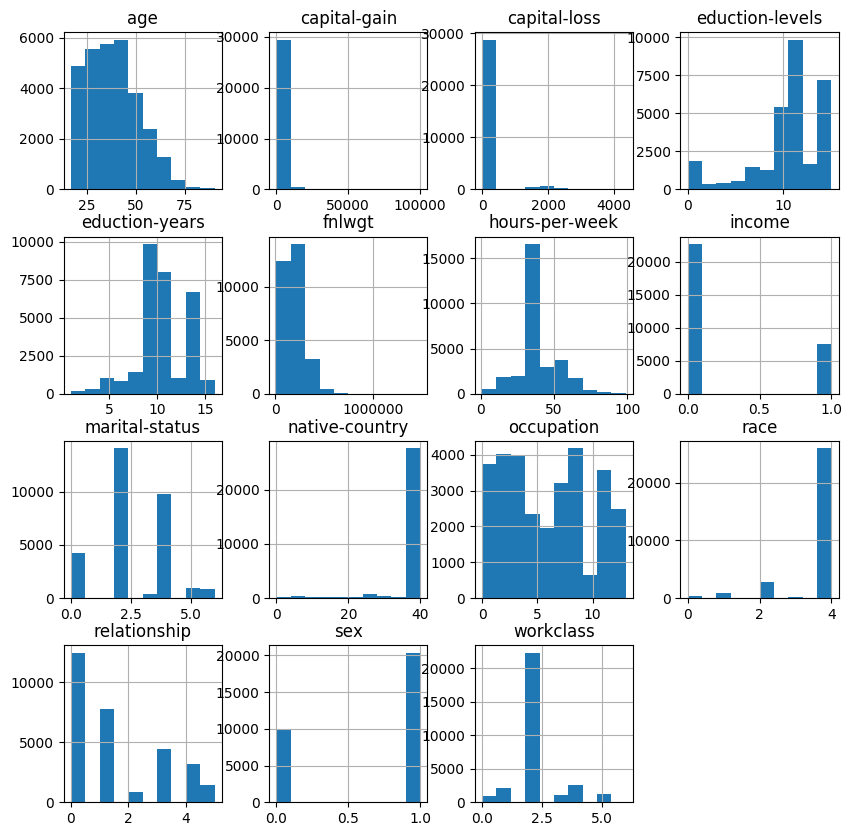

In [4]:
# draw hist for dataset
data.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bee5ee48>,
      dtype=object)

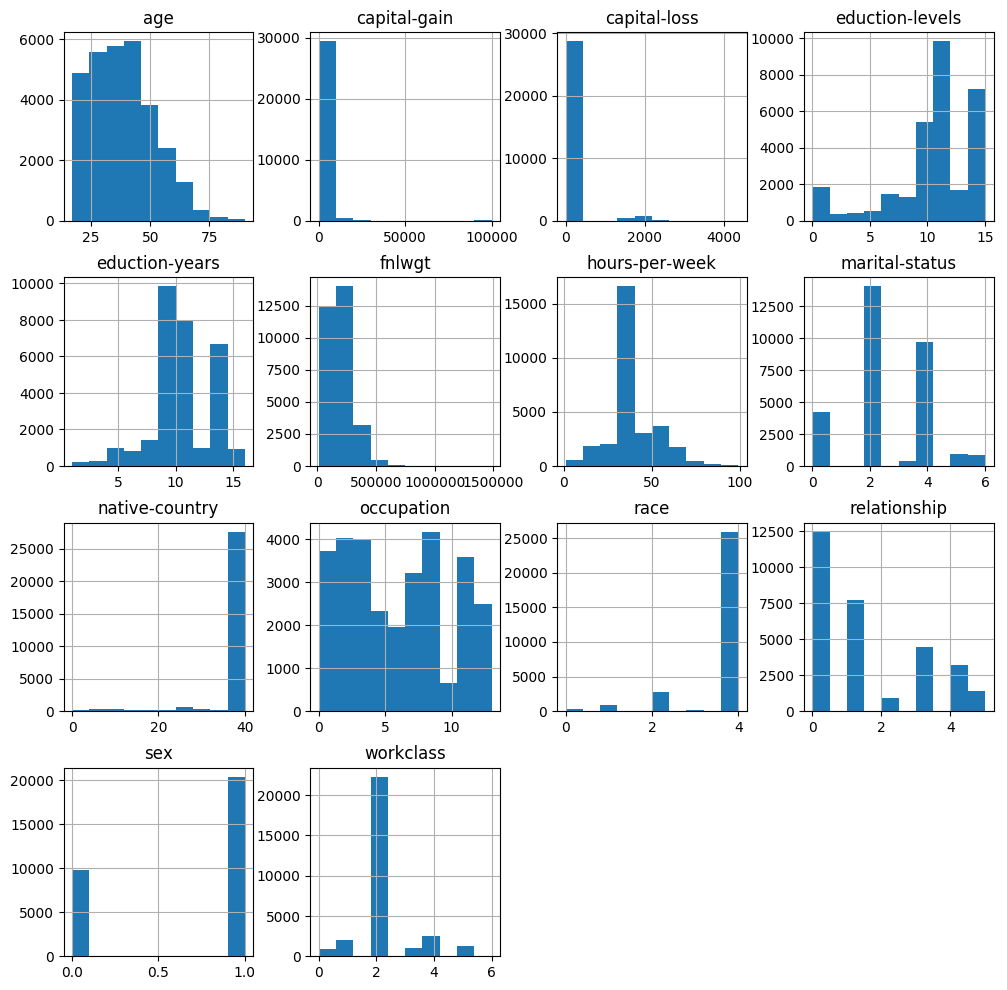

In [5]:
data.iloc[:, 0:-1].hist(figsize=(12, 12))

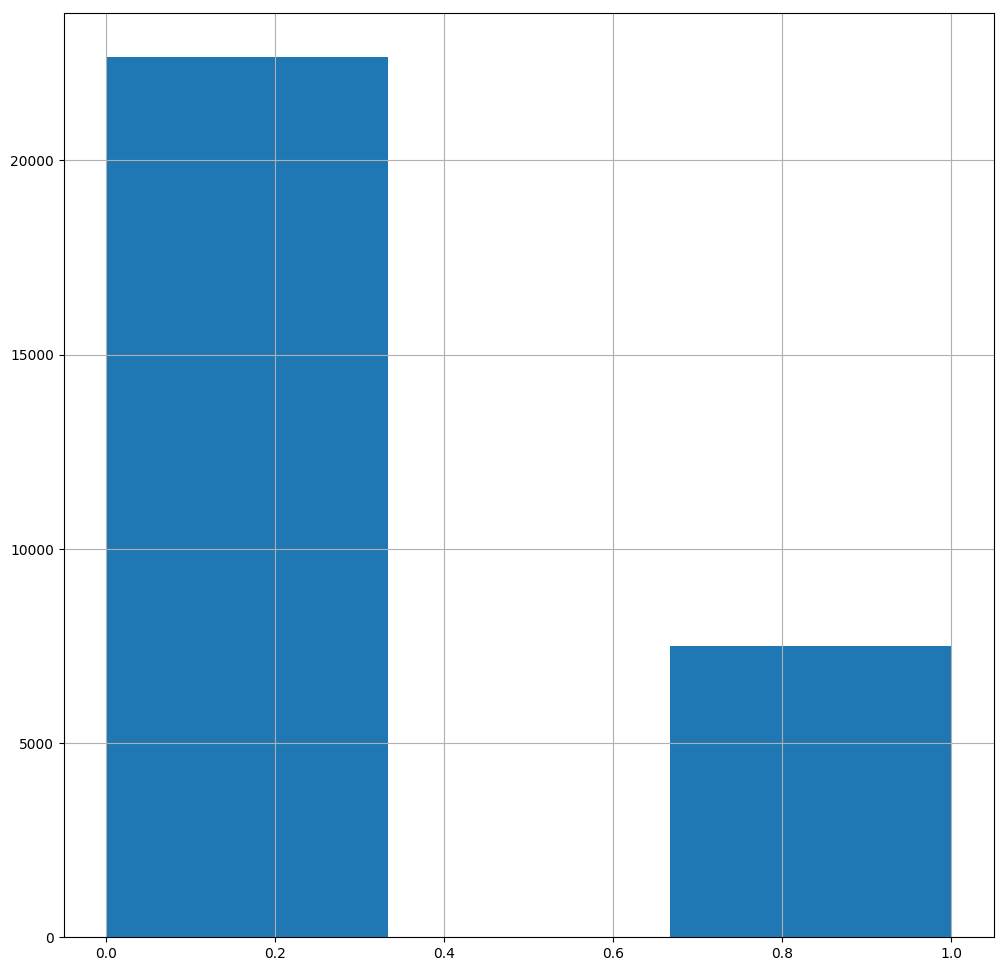

In [6]:
data.iloc[:, -1].hist(figsize=(12, 12), bins=3)

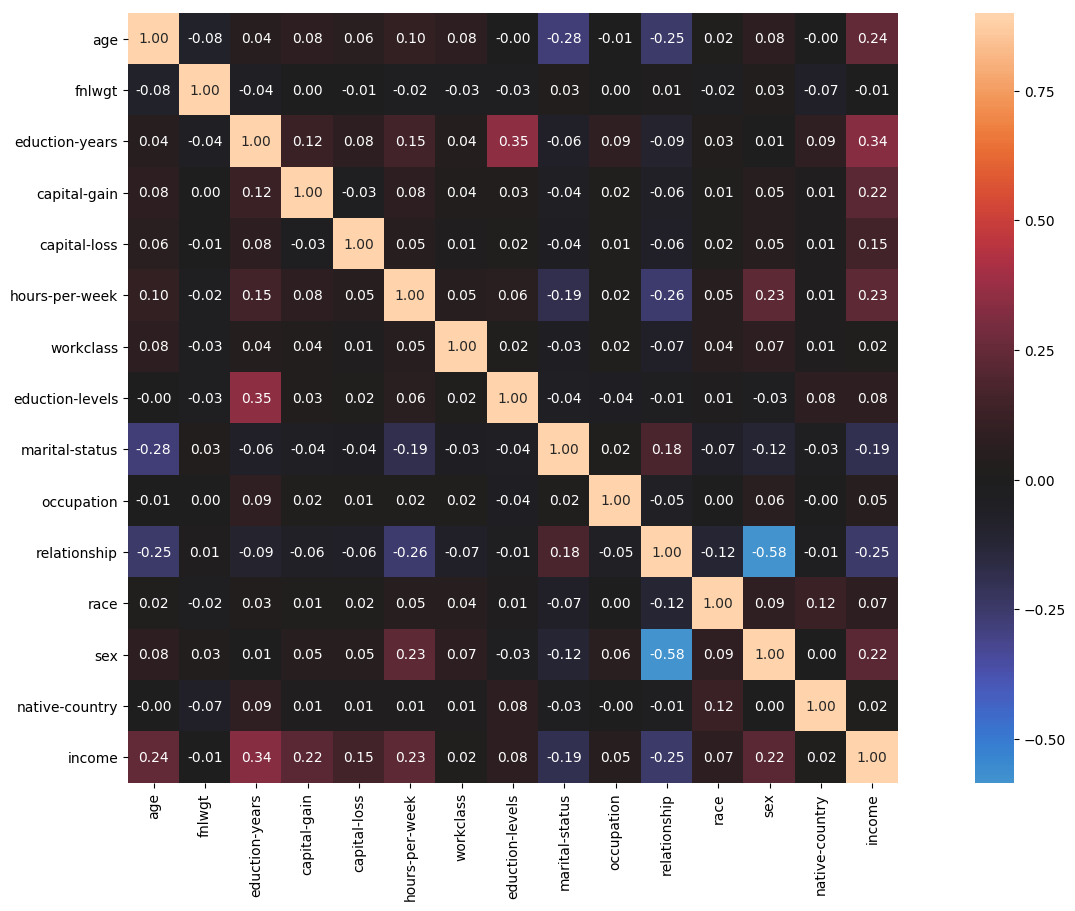

In [7]:
import seaborn as sns

plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), vmax=.9, square=True, annot=True, fmt='.2f', center=0)
plt.show()

# heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']


In [8]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [9]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(24128, 14)
(6033, 14)
(24128,)
(6033,)


In [10]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

# Section 1: NN

In [11]:
alphas = [10 ** -x for x in np.arange(0.0, 6.0)]    # 0.000001 - 1
d = features.shape[1]
hiddens = [(h,) * l for l in [1, 2, 3] for h in [d, d // 2, d * 2]]
learning_rate_init = [10 ** -x for x in np.arange(2.0, 6.0)]

# print(alphas)
# print(d)
# print(hiddens)
# print(learning_rates)

params = {'activation': ['relu', 'logistic'], 'alpha': alphas,
          'learning_rate_init': learning_rate_init,
          'hidden_layer_sizes': hiddens}


In [12]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)

data1_scorer = make_scorer(balanced_accuracy)

Use grid search to find best params. Take a few minutes.

In [13]:
from sklearn import neural_network
from sklearn.base import BaseEstimator

# def fit_NN_classifier(parameters, train_x, train_y, val_x, val_y)


NN_classifier = neural_network.MLPClassifier(
            hidden_layer_sizes=12,
            activation='relu',
            solver='adam',
            alpha=0.00001,
            learning_rate_init=0.00001,
)

grid_seacher = sklearn.model_selection.GridSearchCV(NN_classifier, n_jobs=4, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=data1_scorer)
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7658677095797652, total=   0.3s
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7295412443653277, total=   0.3s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 

[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7216210629073474, total=   0.3s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7366414195067328, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7483002575116763, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.7s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.73664394613684, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7438871055729422, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7338625857762209, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7525044664766117, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.749982423587408, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.9s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7465103218582217, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7381763472967929, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7357986735191937, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7468067219553979, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7535937445432707, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6879875965431107, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 [CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6888899480318126, total=   5.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.9s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7518173935513509, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6158379511326768, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7467937638175085, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7408223032530362, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7502680115724021, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7634739859903356, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7470873122972237, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.3s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7408223032530363, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7345547675787417, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7491570214666586, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6953403436797518, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.75276110507616, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6614390050234077, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7401326480806226, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7316531625943896, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7365211748829998, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.7s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7497281974366469, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7374928315807469, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5573354388584227, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6805369088977576, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7445666542249275, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7391570243188148, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5758308306296477, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7319138648827126, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7341116122877734, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7515000836315581, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.4s


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7451259582531798, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7373437078296822, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6226539509937451, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.742352177782882, total=   1.5s[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7495612789562782, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7623822954748896, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6339350210365535, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7423521777828822, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7345623474690631, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.735537971230871, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   33.8s


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7509699192909515, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7524755170911658, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7018236527032071, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6982121795055845, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6943172643486748, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7174553389416864, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7294058399609521, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7448551494444284, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7580618294541158, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7538745076306904, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7515440581124924, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   43.8s
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7002975813018217, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7479047919836919, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7331552441930574, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7586112933850195, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7584491998022251, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6681685883544434, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.750139481466594, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7435986103534411, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7423344913721324, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7548644157830212, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7651175528854726, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6972668753050619, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6870791581727871, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.0min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7288465359326998, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6262014987510408, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7484918889431221, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7665694679720921, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7515290330170039, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7790785088952732, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7529183151971061, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.744576760745356, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.671852282773921, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7438719457922994, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7673612451360439, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7580594170053285, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6302521307666717, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.2min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7418105601653795, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7391620775790291, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7338676390364351, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7497257849878597, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.759565014805543, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5484815527290477, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5738644233253897, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7405363346636424, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7431822906198858, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7237152947256595, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7804654371908619, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.746068627505041, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5533492371147665, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7531840707456431, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.4min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7576483964512332, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7641783061576722, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5140217267435342, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7391443911682793, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7725047008287796, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7511125785982946, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7488703092250711, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7426053001808837, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7627889654132963, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7641469443234392, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7141828935657069, total=  11.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7225143414970284, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7658823394297856, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7069372074994974, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7473555944758679, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.8min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7296892819202387, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7559633436448288, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7386959542544569, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.746638146372276, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7479047919836918, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7427558643659019, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7241826623509108, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.771137072123488, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7716431119762229, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7029310563492895, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7562513996956559, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.751794653880387, total=  10.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7409526543971976, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7572243650894307, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7659405425574348, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6955738034396625, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.666250538344483, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.3min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7527904906830515, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.688263458612076, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7312242097102989, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.720249332452841, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7584564371485867, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7432802962211403, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.760306985558012, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7481654942720147, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7135083806173296, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7364959085819287, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7586088809362324, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7652627593267568, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6885026596673487, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7472227167015992, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7410981653220018, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7392873754629761, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7593107886547819, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.6min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7598554276881114, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6436010221367253, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5024979184013323, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6570889775761577, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7335766171868272, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7636324901662409, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7477532060295597, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7760119440695971, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7786573642641434, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7471949237704213, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7485868672657842, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7757234488500963, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6278000488922953, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7698519261910145, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7620822327971724, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7575003588963221, total=  13.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7533194751500186, total=  13.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7417852938643084, total=  13.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  3.1min


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7598771397271957, total=  13.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7736012162418, total=  14.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7212628556662553, total=  15.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7254184731114877, total=  15.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7743668781762325, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7206984983777885, total=  15.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.735377300525424, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7551252117488301, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7659960288795393, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7677727399720249, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7544481897269517, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7566677194292113, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7483185850871399, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7593228508987176, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7635950679437482, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7473555944758679, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7451461712940366, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7257244468829324, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7251387962202213, total=  15.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7391443911682792, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7540269514183361, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7599813345390982, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6267077435470442, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6523487898016022, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7490259266703035, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7661379884578944, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6660252088776594, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6847581945141374, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7269053949295127, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7666641623150686, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7629172847130703, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7575003588963221, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7529082086766775, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7416498894599328, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7608477482892293, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7630528413592059, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6744568084359428, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7468266100089007, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7473631743661892, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7494570841443757, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  3.9min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7272115765597633, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7561109625349002, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6492870883459186, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6623779034712454, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6270644577794366, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7453790806511815, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7339853570300612, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.749828246576129, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7709894532334166, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7845852104482468, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5777389794744263, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7602892991472624, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7597325217491172, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6065736012851689, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7488652559648569, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7608019117622733, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7712605665256879, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7494548795543944, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7459661776106119, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7605645727530224, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7438668925320852, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:  4.1min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7665020687322743, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7007100979069167, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6832095093169486, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6716601682505957, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.774211260731, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7469165350713486, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.748030089867639, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7651392649245571, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7759780526897196, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7051409743168404, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7639058256050992, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7595794309339918, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7584633495075942, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6845985133801303, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7711322472259137, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7757190016413843, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7509999138648827, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7484742025323724, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7405540210743922, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7551572411143768, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7704158648146413, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.7040330758850384, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6701429268712854, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6481982256165839, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 257 tasks      | elapsed:  4.6min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7410855321714663, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7547291050561314, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7650157705223573, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7467760774067587, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7638710061335937, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7468165034884723, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7594844526113297, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.716405731610707, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7511302650090441, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.772495051033631, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7611236864790747, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6619310296974745, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7433505412156536, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7233368744437108, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7374791122340577, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7554355917530094, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7617942323633912, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5596297338424876, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6155570358034971, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5129084383703236, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7558098136610296, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7610941456831951, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.0min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7725312377654383, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7547088920152745, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.770539359216841, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5985582976290914, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7624911424387724, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7669731545551122, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5541794641330899, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7435783973125842, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7747290934890535, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7706918030044867, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7590504464670247, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7648753889786474, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7554212868586523, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7501116885354158, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7670925442925597, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7154520658072296, total=  11.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7183284044905108, total=  11.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7202745987539119, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7390014068735824, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7565323150248358, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7552858824542765, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7861101078387583, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7757286514365329, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7327922325582251, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7693179821413191, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7723726779407966, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed:  5.5min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7445489678141778, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7780886007429424, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7682204215398133, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7162532878230614, total=  12.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7551555313101153, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7415372247265211, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7559922930302748, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7499914439116826, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7673684824824053, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7146396393809756, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6982197593959056, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7665719946021995, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.685191401389203, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7370627925005024, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7484413563409801, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.768358390634736, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7879326554581999, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7504229234258808, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7584608228774871, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7530739326423382, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.777357743638947, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7619466761510368, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7165557629495657, total=  11.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:  6.0min


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7529410548680697, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7531992305262857, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7454220333630021, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7590396753625107, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7665334305665074, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6237758190014069, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5751538086077695, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.747766860949209, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7559426914352982, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7727889976743517, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7651489147197057, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6460722806417757, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7857251499394361, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5825181554003012, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7509872807143473, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7596046972350627, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7562438198053345, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.763195635351703, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7791827037071757, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7608384966550862, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7490511929713745, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7588923023916853, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7658363477455322, total=  10.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7769534861493275, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7240745355881594, total=  16.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7330552126101813, total=  16.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  7.0min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7401073817795516, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.760682879209854, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7448324097734645, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7240568491774096, total=  16.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7750026192301118, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7638710061335937, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7561311550719229, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7577762209652875, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7448475695541071, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7694573184965436, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7708394218945582, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7468240833787936, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7369650796889274, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.74959028395877, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7430443595854028, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7561109625349003, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7322162316906625, total=  16.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7622057271993722, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6746805248499814, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6665718797553764, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6714499985644147, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7636274369060267, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7565323150248358, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7446944787389818, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7665406679128689, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7484309892602375, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.665256762668343, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  7.3min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7580722960751098, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.753615550259841, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7499813373912543, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7630817907446518, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7705490090119896, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.64897640946746, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7459813373912545, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7316582158546039, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.748481650684768, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7368020902121794, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7555421990136991, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6594098021763474, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5856047546584743, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6021069798156709, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7671237187401303, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7730749662637458, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7531689109650003, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7676371833258893, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7928315347953233, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6879865105054104, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5923477354228357, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7559831175170117, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7576357633006977, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7698808755764605, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7519250050245484, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7746031866380667, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7526500330184617, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7451234316230726, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7517971805104942, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed:  7.7min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7558519114865648, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7690144618263295, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.69347957162135, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7150003732521749, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6929101610726693, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7715880444457206, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7528981021562492, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7101657605049508, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7640134370782967, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.736076953899712, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7679034717205862, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7601589480031009, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7406565792873755, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7586113870625053, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7031828700512636, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.764473543937815, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7777861256164381, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7536206035200551, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7529360016078556, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.749999023802004, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7569797887338182, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.762786552964509, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6872423555083408, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6966949381262741, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7707326653076461, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7666972924861467, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6572597548020327, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7718260070630796, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 [CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7683342661468645, total=   0.8s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.3min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7616031893951508, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6734717251811865, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7588998822820063, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7629074621723277, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.7095000395182088, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7689126794632142, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7523387981279968, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7784542590519674, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.74779212725028, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7340232564816674, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7490600640011177, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.753209337046714, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7622202018920952, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6172627408194322, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5286260300324442, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6243149099888023, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.771166671451951, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7502496195698987, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7515162651813143, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.642238095369385, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7775487866071872, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7821210663299348, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5938629830181987, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7783870912170893, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7595870108243131, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7463749174538458, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7688933798729168, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7829512933482584, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7559704843664763, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7550176002756324, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7512328232220274, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed:  8.9min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7555807981942937, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.770822534753048, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7177842602429011, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7218171064342934, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7544431364667376, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7592985156048121, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7222031066065634, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7431570243188147, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7275252824632895, total=  11.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7734946089811104, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7851587988670222, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7636274369060266, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7421915070774355, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7513884406672598, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7687650605731428, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7241657752094006, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.782348755544037, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7511151052284016, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7493321083005542, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7458206666858077, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7604459032483969, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7611236864790747, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6838218725774499, total=  11.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7005923799132907, total=  10.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7612573430187488, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.648870194378248, total=  10.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7476390364351545, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7476238766545121, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7626268718305018, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7666882868029402, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7126757411502189, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  9.6min


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.750427976686095, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7546189669528267, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7562609938737587, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7452436762468057, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7631932229029157, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6903517442234489, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7390342530649746, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7397415946481382, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7512707226736339, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7625154396722379, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5497330385598209, total=   8.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7644518318987306, total=   8.7s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6305470728415976, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5694278905509776, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7410678457607166, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7655761577995349, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7485944471561055, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7647374198837246, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6052608845094135, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7817385208793997, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7860440437566397, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7452638892876624, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.767111085589595, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7736349905248202, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7779506316480196, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7578090671566798, total=  10.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7508291366390077, total=  10.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7653085958537129, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.749015820149875, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7683318536980773, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7250147865284677, total=  15.7s
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7379181716385771, total=  15.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed: 10.6min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7726712796807259, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7431721840994574, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7319441844439977, total=  15.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7526045536765338, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7678185764989809, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7674968017821794, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7516643027362256, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7594743460909013, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.74678365729708, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7630649036031418, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7653862537289566, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7300256133134089, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7511151052284016, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7404034568893739, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7392924287231905, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7573743964282893, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7362776466631008, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7567935706631523, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6936276091762612, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6577862126388929, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6878067127968072, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7490107668896611, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7556946222975107, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.757781066366696, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7547139452754887, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7555277243209761, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6893570111735438, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7412386229865916, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7534700393350369, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.7083528626806581, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7529309483476413, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7668166061027144, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7658146357064478, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done 570 tasks      | elapsed: 11.1min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7476592494760115, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7338802721869706, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7277734072181228, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7530756424466, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7559729934399774, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5915585288121968, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6919452180654053, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6309861322461167, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7591631112004364, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7612497631284275, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.737458899193201, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7764112595647852, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7845003152266417, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5466881213778806, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7508341898992219, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6529081265979602, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7626316001033622, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7538838324384851, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7721052682367343, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7687409360852712, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7497307416233598, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7529132619368917, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7422117201182922, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7583425925415356, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7616586757172555, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7068093829854432, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6928126561199001, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6994636653363575, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.744145281231158, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7576206035200551, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7654129604639811, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7045915103859367, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7586137058338067, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7688620180386838, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7566727726894256, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed: 11.6min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7623582646645037, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6934743719821415, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7545684343506848, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7675136889236894, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7668093687563529, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7576307100404833, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7519578512159407, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7498711992879498, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7568345822925341, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7633239546514771, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.7096084297568118, total=   8.3s
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.710019696230153, total=   8.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.761407907203767, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7580546096643602, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7520503029084956, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6769748198340463, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7521826917598103, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7650157705223574, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7578040138964656, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.68850989701371, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.760422176921531, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7606803525797466, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7652989460585643, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7634691610927612, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6796099139238274, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7370804789112522, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7593566280972752, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7474960521404576, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7522430029794892, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5818933647247985, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7411065649853967, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6815391771225129, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5193063251887795, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7711641448218439, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7700404835051251, total=   2.5s[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 12.3min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.742901375290706, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6669775279246691, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.767663720262548, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6174890130189522, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7435803588988573, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.770142339073583, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7691901576272647, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7569435814981768, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7518098136610297, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7687457609828455, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7608637629561572, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7511201584886157, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7487475379712307, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7652892962634156, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7697187819936662, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7239037583622844, total=  11.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7058514456343852, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7094654454621149, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7275132202193537, total=  12.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7379030118579345, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7444287231904447, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7767040848961407, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7562412931752275, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7789140028636916, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7576307100404833, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7591909041316145, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7562337132849063, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7172383710778178, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7730662270036193, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7682107717446646, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7600271710660542, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7516870424071895, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7486121335668551, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7569435814981769, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7693169369528338, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.687328260931982, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7191913635189067, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6810127192856527, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 13.3min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7582127537396998, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7542950989118264, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7424850555571505, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7399521508014845, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7642704387256388, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7485919205259985, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7458181400557008, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7157424230727522, total=  11.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.75972469593955, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7679275962084577, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7421889804473283, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.709221688879576, total=  11.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7481983404634068, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7430468862155102, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7589175686927561, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7593373255914406, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.764018625023665, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5512805995004164, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5646028309741883, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5008326394671109, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7544860891785582, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7634819259812226, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7588821958712566, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7466711653092621, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5392006844921359, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5256810917318717, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7741941042508727, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7578115937867869, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7512580895230987, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.779107458280719, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7251274512618795, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.765833935296745, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7548720893508283, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7548544029400787, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7531739642252145, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7680655653033804, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed: 14.2min


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7682107717446646, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7421192684257372, total=  16.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7368197766229292, total=  16.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7227876769358866, total=  16.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7722701197278131, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7683625714203681, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.747598610353441, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.766131585525675, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7775391368120386, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.756136208332137, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7558275000717795, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7407143697397129, total=  16.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7486020270464266, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7641855435040337, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.769716369544879, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.748486835682908, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.752083149099888, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7393129667514011, total=  17.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7434505727985299, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7530877046905358, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7697091321985176, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6921114014183584, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6556172155387753, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7728420569066009, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.746374917453846, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7555592178931348, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7644494194499434, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7685909047464126, total=   0.5s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6986588188004249, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6930508149022246, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7490309799305177, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7569814809497832, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6960490292306081, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.757497890830489, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7477668609492089, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7654272653583383, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7430569927359385, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7443135318269258, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7486147948821162, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 753 tasks      | elapsed: 15.0min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7413765540210743, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7587347877872194, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5550527434034858, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5836484538746448, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6487182520313531, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7661379884578943, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7515011054006719, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7750146814740476, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7463723908237387, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7758497333899456, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6881949001292154, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6061178782214233, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7483261649774614, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7512530362628844, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7473454879554393, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7643211001501693, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.769873638230099, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.753615550259841, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7459762841310402, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7444287231904447, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7594511701984918, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7612423559837002, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6948614085962848, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7104158029228517, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6773734531568519, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7314748054781935, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7677729478308307, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6775162530121146, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7423395446323464, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7840260967221945, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7473417111935786, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7648662895862643, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7531992305262857, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.764021016968618, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6927990012002507, total=  10.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7744555677479952, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7716768862592432, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7501546412472365, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7512833558241697, total=  10.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 15.8min


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7467912371874013, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.758633005424104, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7563989629686815, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.689594762984869, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6947335840822304, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7482084469838354, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6340458813058083, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7748832294926642, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7702961325332337, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7694669682916923, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.759833715649027, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7558653995233857, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6519441809897198, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7527702776421946, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.754713945275489, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7715437420618948, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5861125892146537, total=  10.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7645922134424404, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7370880588015735, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7422268798989348, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7431974504005282, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7408451014882742, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7675136889236894, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5899958080909588, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5748905796893394, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5070799621005484, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7538939389589135, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7498838324384852, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.561252074705957, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7956657026061801, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7646005340377271, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7857372121833719, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5508585560597957, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7391494444284936, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7705876081925842, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7625239886301645, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7588847225013639, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7679034717205862, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7540445031439318, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7538636193976284, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7566828792098539, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 833 tasks      | elapsed: 16.7min


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.765991203981965, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7709798034382681, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7144814953056362, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7166883918573603, total=  12.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7664113238967527, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7394025668264952, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7172375893651841, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7537231617330385, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7679082966181605, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7186252993734067, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.762612397137779, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7549847540842403, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7675248786930432, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7565398949151568, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7163960818155584, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7598530152393242, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7659839666356036, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7602994056676908, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7527854374228373, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.756691788300037, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7430620459961526, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7745838870477694, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6732557351632262, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6914131327342159, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6958648252892703, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7577913807459301, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7613775876424819, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7125643089919548, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7721195555427947, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7647325949861504, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7588534572918448, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7486197134571765, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7438972120933706, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7552858824542765, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6890858978812727, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7765395788645593, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7564086127638301, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7566955123603895, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7522574776722121, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7497307416233597, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7569663211691408, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 17.7min


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7652748215706926, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6951110855895949, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5286108702518016, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7511100519681875, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.74831858508714, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5519430092288804, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7491570214666587, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.746956961153062, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5883611063627993, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.761142986069372, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7627821642883804, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7527803841626232, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.765817048155235, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7664171735106691, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7799144391168279, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7512429297424559, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7583532114042896, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7638805593040283, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7716817111568175, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7659791417380293, total=  10.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7280543225473026, total=  15.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7282074133624279, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7095781101955267, total=  15.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.757091619053088, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7484539894915156, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7316253696632116, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7619756255364827, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7816926843524437, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7508417697895432, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7548619828304, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7598602525856857, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7552631427833126, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7730469274133219, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7435027010236136, total=  16.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7484640960119441, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7491689109650006, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.744842516293893, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7569580766947339, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.746951928396682, total=  15.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7644349447572203, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6334734847397284, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6659822561658388, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=4)]: Done 917 tasks      | elapsed: 18.9min


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.64530672715266, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6498857877817052, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7519553245858337, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7625189353699504, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.761239656607999, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7624913151843663, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7731848965082446, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.753206810416607, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7479098452439059, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.6485991484285539, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7511024720778661, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7588751693309292, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7583618921318328, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7411158517327515, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7386002469206695, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7312368428608345, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7518242707971468, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7420844108937917, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5691596083723335, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6265394929512762, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6766369404806338, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.776175141405151, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.733982830399954, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7701405150880013, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.77192628751243, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7725022883799925, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5988414731652982, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7570789859025526, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.593153378439233, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7600033305578685, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7494220333630021, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7669545751976371, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7815378281160109, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7523691176892819, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7470822590370093, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7415119584254499, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7623702332309538, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7644252949620718, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7030599787533378, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7009733268253467, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6790412587211806, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7427760774067588, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7544330299463091, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 960 tasks      | elapsed: 19.5min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.7082173060345224, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7567790959704295, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7883393253966067, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7559805908869045, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7413639208705388, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.699307673149491, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7549948606046686, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7673818943983463, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7582022109978256, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7713719986839518, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7550125470154182, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7564145970312096, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.75011674179563, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7490455893083946, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7720714939537141, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6405564328576762, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6875409572482702, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7456827356513251, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7495675442878063, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6755601366677193, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7358087800396219, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7739012789195171, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6948637127265175, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7824018294173546, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.758220333630021, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7570714060122311, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7659773177524477, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.6349136710945442, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7649043383640932, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7653959035241054, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.748486835682908, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.74292411496167, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7502597260903269, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7480605060536383, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7644373572060077, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5433250452209367, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.655441385052686, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7678335869534009, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5701655516954263, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7497282149932528, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7686384334893335, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.6314161947457326, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5840406403420256, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7651585645148543, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7579431599494904, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 20.3min


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7563918573602458, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7508190301185793, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7547215251658101, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7673588326872567, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7715147926764488, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.759058026357346, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.753615550259841, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7498459329868786, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7629245220594318, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7634691610927612, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7105891067788338, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7114166929857303, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7633338884263114, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7428836888799564, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7708453300410576, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7869837589352509, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7089061414338625, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7179547534890903, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7687119866998253, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7469266415917769, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7538661460277354, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7469392747423125, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7690337614166268, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.7216968061935143, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7715461545106819, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7506810990840966, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7472479830026703, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7501369548364868, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7583715419269814, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.767520926270051, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6779529702259611, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6796157225300756, total=  11.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.6811228573889575, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7401275948204084, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7413538143501106, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7389887737230468, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7704496390976615, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7688692553850454, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7523564845387465, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7028147992934514, total=  11.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 [CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7463723908237389, total=   4.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7526298199776047, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7565321071660298, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.7186277118221939, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7665382554640817, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done 1050 tasks      | elapsed: 21.4min


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7491967038961787, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7537383215136811, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.75656588144905, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7522135002440494, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.76483920224684, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6458912974819835, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5595716213500245, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.531374544201671, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7605777943667634, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7637704212007235, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6605195173999593, total=   9.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7469181541136618, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.75098475408424, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7687336987389096, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.6619479168389845, total=   9.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7563691176892821, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.750813976858365, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7623835309655747, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7765781780451537, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7787591466272589, total=  10.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.760015963708404, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7587467914668811, total=  14.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7492916822188405, total=  11.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7651754516563645, total=  10.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7748815372766992, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.733075425651038, total=  15.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7279340779235695, total=  15.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7094502856814725, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.6838840047087198, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.6691420368084067, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7254108932211663, total=  16.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.6998740242219049, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7070870163384817, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.6901363806023716, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.6838941112291481, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.6766736914640098, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.717398052211825, total=  16.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.6900179072627116, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.6898558136799172, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6694532716988716, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6852759482040829, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6683397169025811, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6901558763576343, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6813818001187385, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5074962818341039, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.7324994072268695, total=  17.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5131843004392892, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 1097 tasks      | elapsed: 22.7min


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7079456774526975, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5263711275086853, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7077900600074651, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.6831791897556633, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.6905263595642337, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.6903763282253752, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.6930480921071522, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5062447960033306, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.6944450888627294, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5419175613405313, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.6915428046532232, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.6877864997559504, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.6965169294168032, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6633363002095953, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6868229060404042, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6619519366045538, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6848621551006345, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6737356011270962, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.7280679893192455, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6347904332596399, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5008326394671108, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.6544253352091649, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.6705516667145195, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.6623379367768238, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.6614929979248345, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.6924989385225337, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.6909765999598037, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.6876435154612536, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.6704112090499296, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5231831733305394, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.6933581149263033, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.6856805541004278, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5020815986677768, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.6827780298027507, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.6727838295673146, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.66972660713773, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.6851576271061828, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.6788766443710448, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5488700795314251, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5391517413649547, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.690984179850125, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5562233770708317, total=   7.9s[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.6325932986878751, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.6599830026701887, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7096573082034288, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7023936546623216, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5805166270565552, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 23.3min


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.6916738350225388, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.661239541761176, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.6750109391598954, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.6823572335783463, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.6888876175666709, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5725969023238544, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.6612572281719258, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.6742960176864108, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.6634742312440781, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.6786079435275608, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.6708213629922085, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   9.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.6889076344425623, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7046378592552184, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.6705516667145195, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.6894660308830206, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.6863583373311057, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.6790159924201098, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.6855593901633698, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.6805419233052662, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.6783440236584455, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.6925182381128311, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.660833328548049, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.6651294036578714, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.541509202101697, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.677632510067953, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.6089860500723276, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.6945905997875335, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.6720967010250078, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.6219220764305607, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.6798544902794397, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.666488834727499, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.676096701025008, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.6669503000373251, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.6748654282350915, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.6947498681194664, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.6714967337740992, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.661811478939964, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.6758258922162566, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.6606953975135662, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1193 tasks      | elapsed: 24.2min


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.6813986872602485, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.6727649925650626, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  13.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=  13.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.5000000000000001, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.5000000000000002, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5, total=  14.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.5, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.5000000000000001, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.5, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.5000000000000002, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.5000000000000001, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.5, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.5000000000000001, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.5, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  14.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.5000000000000001, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.5000000000000002, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.5, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.5, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.5000000000000001, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5, total=  14.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=  10.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=  10.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=  10.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.5000000000000001, total=   0.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=  13.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.5000000000000002, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.5, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.5000000000000001, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.5, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.5000000000000001, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.5000000000000002, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.5, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.5000000000000001, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.5, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.5000000000000001, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.5000000000000002, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.5, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.5000000000000001, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.5, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.5000000000000001, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.5000000000000002, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.5000000000000001, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 25.2min


[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.5, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.5, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.5000000000000001, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.5000000000000002, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.5, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.5000000000000001, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.5, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.5000000000000001, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.5000000000000002, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.5, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.5000000000000001, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.5, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  16.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=  16.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7511024720778663, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=  17.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7555541646329209, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7469316948519911, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7661267606281007, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7718220927005274, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  17.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7428963220304918, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7506937322346322, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7370577392402882, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7527755797688829, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7522044037988946, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7105815268885125, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.6935023112923138, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7134730253524363, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1.0, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=  17.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7211352800186748, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.721929320305191, total=   6.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5285982371012663, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.522907691865974, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7378752189267564, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7359416578138909, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7345598208389559, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5129059117402165, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7567983955607267, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7578997358713214, total=   0.8s[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5134626130174818, total=   6.3s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5194290583821797, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.740551494444285, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7415170116856643, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7295614574061845, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7470947223891791, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7510910012443641, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7172451692555055, total=   5.6s
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7139070314967413, total=   5.6s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.6996268626719112, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1293 tasks      | elapsed: 26.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7178191968429547, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7187560311219678, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5441526314278332, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000002, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.6049908983892732, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7779960377846049, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7822668465933561, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.735951764334319, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7499800111386207, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7611116242351389, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7484767291624796, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.740814723362715, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7395657641620487, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.754307714505756, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7581732616123797, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7069700536908898, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.6912752016997329, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7075040914180711, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7169744951319081, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7122232346848562, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5617911510522842, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5792917396422522, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7557047288179392, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7591732177208648, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5798384105199689, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7504102902753451, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5831645767967459, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.760291047011964, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7606832422576478, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7404009302592667, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5759419348850204, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.752080622469781, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.73470533176376, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7601361907755312, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7529111364150185, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.71543437939648, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7168313761520573, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7062677653679404, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.721566074444953, total=  10.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7270751884467139, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7593414683166327, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7618141204168939, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7467988170777224, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7477532060295597, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7413559662385835, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7420712624537024, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 1344 tasks      | elapsed: 27.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7452664159177698, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7513958888196555, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7370653191306095, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7620822327971724, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7239163915128197, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.721140084412415, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.705731201010652, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7251822202983902, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7261335292701263, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7175882167159552, total=   1.3s
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7484489362313016, total=   1.2s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.756931539758075, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7156394958224468, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7661098734865904, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7547291050561314, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7498535128772, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7447172184099455, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7579166230128316, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7605380358163636, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.713207269803899, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7211473422626105, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.6983576904303884, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7193217146630682, total=  13.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7170883397389592, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.530817766803526, total=  13.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5108243130724398, total=  13.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.506661115736886, total=  13.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7526272933474978, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7603044589279049, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7741910476901434, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7305099411270592, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7811528702166884, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5111026637110724, total=  13.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7508291366390077, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7486045536765339, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7538863590685921, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7580763041468387, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5, total=  14.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7577497045324628, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7235025984093716, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7260124473167137, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7169718338166472, total=  13.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7061424674839931, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7259883228288422, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 1397 tasks      | elapsed: 28.7min


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7618494932383933, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   6.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7533346349306612, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7301131815441154, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7642265551334153, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7499775986898336, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7502976255419335, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7514061270780097, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7309660340520829, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7626509963183735, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7541383835766001, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.724089695368802, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7244807488012863, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7127060782681098, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7304781197787716, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7238025293491628, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7412335697263776, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7846571535214908, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7402554193344626, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7741067965804803, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7656694292651636, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=  10.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7334690057136294, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.73664394613684, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7555592178931352, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7515169707730681, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7470464734134359, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7028144362456573, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7162695454936978, total=  14.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7154318527663729, total=  14.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7225270332118379, total=  18.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7219462074467011, total=  14.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7646131671882627, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7509569611530622, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.761242183238106, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7697067197497304, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  19.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.771517205125236, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7615332050877143, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7573497947113039, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7438567860116568, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7590324380161493, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.1, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=  19.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7658218730528094, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 30.0min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.717375520399667, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7130642855092021, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7032231760888914, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7255792404416481, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7234686923884254, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5234594160039049, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.534702575440007, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7561286284418158, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5083263946711074, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7469367481122053, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7332931752275402, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7733711145789106, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7777981878603739, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5077721058426293, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5170691090757701, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7566651927991043, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7524969422033363, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7399871371558183, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7536130441335679, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7536251063775038, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7211299778919865, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7170971317005944, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7014224927502942, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7235169413641687, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.727360776431708, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5101321312699189, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7513934939274742, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7658242269373224, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7534509505507736, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.752464096011944, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5070774354704414, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7679058841693733, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7595867268446274, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7693078756208906, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7547265784260243, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7491537511843578, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7616442010245326, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7191762037382642, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7163847368572167, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7005746935025409, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7258503537339194, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7169431332976751, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5494319101897845, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5919293692038246, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7707427718280743, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7594263401188664, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7622152803698067, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5348455597347038, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7684722352417872, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5698375204253998, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7825301487171288, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7531941772660714, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 1505 tasks      | elapsed: 31.1min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5974670666276999, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7530436130810533, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7573624278618393, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7652989460585643, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7683246163517158, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7287692440207872, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7218196330644003, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7093300410577392, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7305895519370357, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7294664995873563, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7356733756352466, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7764105773924029, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7591706910907576, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7636216048804069, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7619129018680166, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7540369232536105, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7527829107927303, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   9.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7520705159493524, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7612785427155075, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7733276905007417, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7336776823911109, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7262763788796692, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7092148496942203, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7317198416330764, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7301708197546931, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7266219529702259, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7155015647879641, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7673853696239155, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7559477446955123, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7908879052224692, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7555592178931352, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7483059519366047, total=   5.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7526272933474978, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7622274392384566, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7573309723501205, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7030776651640873, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7226698272043349, total=   9.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7265269746475639, total=  14.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7148725487381206, total=  14.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7277674463701147, total=  13.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5156847454707285, total=  13.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5037468776019985, total=  13.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5423367883085933, total=  13.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.757671136122197, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7698823394297856, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 32.5min


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7726687530506188, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7662406052351517, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7758738578778172, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7477643343191019, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.756655086278676, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5726162019141519, total=  13.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5546879164346121, total=  13.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7694573184965436, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7570916190530879, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7676034090428691, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7312747423124408, total=  12.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7343344913721325, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7085100347411639, total=  12.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7346147801776665, total=  12.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7304419330469643, total=  10.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7348255763874931, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7834359872520027, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7846213971800542, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7722928593987767, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.771688948503179, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=  10.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.75920353728215, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 [CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7608258635045508, total=   4.2s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7338726922966492, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7626534087671607, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7681914721543673, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7385633810904706, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7372942088489477, total=   9.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7243807172184098, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7371440604132318, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7435292379602724, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7576357633006977, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7419232248987913, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7812932517603983, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7181424674839931, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7893774825246805, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7527728042723019, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7349736139424045, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7505406414195067, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7790833337928474, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7694452562526078, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7275177581900141, total=  17.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7273646673748888, total=  17.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7093325676878462, total=  17.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7314125416089977, total=  17.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7266854056498173, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  17.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 1617 tasks      | elapsed: 34.2min


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.754021763472968, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=  17.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7567955439432655, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7506735191937753, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=  18.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7789357149027761, total=   0.9s[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.757878023832237, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.758338051623647, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7567980705733728, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7442806856355335, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7654320902559126, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7701375141760086, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7183511441614747, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7137539406816159, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7050213327973813, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7246110443284018, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5231835539349394, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7198646087789242, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5116569525395506, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7580824025955383, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5095753538717736, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7374614258233082, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7678137516014066, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7456650492405753, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7719479995515143, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5210991622139755, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5090210650432955, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7547316316862385, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7406793189583393, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.736097275259123, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.756406200315043, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7627527786814888, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.723918918142927, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7165454075626633, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7018388124838496, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7239260237513625, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7215395375082942, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.500832639467111, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5004163197335554, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7556996755577249, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.763609750495277, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7523362714978896, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5162364696086594, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7521923415549588, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7647157078446402, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.755268196043527, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.757786327485716, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7530385598208388, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.758901706267588, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7673443579945337, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7143208246001895, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7170769186597377, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7075141979384995, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7239115490586395, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1674 tasks      | elapsed: 35.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7220745267464751, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5681865112406329, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5755322288897184, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7504128169054525, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5554033707542566, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7467735507766518, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.757340622145269, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7266320594906542, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7718245051493146, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5901016307234774, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5749665014254126, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7554010738177955, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7602716127365128, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7531739642252145, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7751671252616934, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7706773283117638, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7207187114186454, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.72224100605817, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7108649688477992, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7285031283716844, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7266709309570943, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.768387837721439, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7571967038961784, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7640437566395819, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7655724717996225, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7651127279878983, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7562741393666198, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7540192368428609, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7477643343191018, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7583594796830457, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7726306076797667, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7272671624221196, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7196203164029976, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7136513824686324, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7296358305165123, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7304564077396871, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7459510178299693, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7563590111688536, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7466381463722759, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7889322134056794, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7485944471561056, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7915777506970829, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7695913175801775, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7672464899939705, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.771420247659695, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.776111196887068, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7247562507696862, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7230761721553878, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7216715955094893, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1733 tasks      | elapsed: 36.5min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7122316460420913, total=  12.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7329084896140634, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5186015102357233, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5237378047029775, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5, total=  12.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7477542277986735, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7540116569525396, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7267624106348157, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7496895982560523, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7588824066772907, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7764181572827243, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.759060552987453, total=   5.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5295659384287928, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.521929389232299, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7456877889115391, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7711467219186366, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7645777387497175, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7300232564816675, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7286186798357691, total=  11.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7219803037698469, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7333706458745748, total=  11.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 [CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.5s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7236976083149099, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7354498320935644, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7319138648827127, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.745928245961331, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7621152487869305, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7857468619785206, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7598906658244567, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7579065721094489, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7708611339336426, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7562463464354418, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.768043853264296, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7339282781590055, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7411891240058572, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7345254816388641, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7448047340975972, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.740351123879475, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7431671308392432, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.735369720635103, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7855100060294581, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7537510132284907, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.796568762602173, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7710312670475753, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.761094145683195, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7576307100404833, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7789260651076275, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7787519092808973, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7211299778919865, total=  10.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7282048867323209, total=  17.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 38.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7142005799764564, total=  17.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7327994699045866, total=  17.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7662961325332338, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7602690861064056, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7715375118435785, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7727902888137738, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7815619526038824, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7320806750445269, total=  18.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7570815125326595, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7591605845703294, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7528879956358205, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7595987890885632, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.768755410777994, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.720154354130179, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7159734703838756, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7075167245686065, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7255840653392226, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7248580331328015, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5144383129001695, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5352568262080452, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.755295988974705, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5240187200321571, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7479022653535847, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7533220017801256, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7597150461444016, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5199905845570193, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7825229113707672, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5531630190441005, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7601513681127795, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7548493496798646, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7405489678141778, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7607121916430937, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.762912459815496, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.722243532688277, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7143258778604037, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.702806856355336, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7197604139670217, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7227933216065349, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5413687444371071, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.786922162565678, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5111026637110724, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7480174567171036, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7284074765281805, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7700188446713833, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7727758141210508, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7584911424387724, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.761385167532803, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.754982227454133, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7662502550303005, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7676444206722508, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7162619656033766, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7166656521863966, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7059893766688679, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1853 tasks      | elapsed: 39.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7247441885257504, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7223552898338949, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5676322604725949, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5899831749404233, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7605676878463349, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7470544661058314, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5874827299089839, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7238330127192856, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7480194944242565, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7670925442925599, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.595116767116439, total=   7.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.6028840480614941, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7530486663412674, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7627670045077378, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7599982772976542, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7601313658779568, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7697091321985176, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7239062849923914, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7266699589422607, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7090592322489878, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7296141184774279, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7272276322343596, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7607308851818887, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7648738694765856, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7435885038330127, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7575003032792761, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.75956742725433, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7587467914668812, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7563741709494961, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7537357948835739, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7662357803375776, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.766685874354153, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7337928737546298, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7239163915128197, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7090718653995233, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.736025832961127, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.731840923586489, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   6.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7552530362628845, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7569637945390336, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7775463741584001, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7793475551982542, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7859890258853458, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7531992305262857, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7467861839271872, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7452487295070199, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.763195635351703, total=   4.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7670660073559011, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.71389945160642, total=   8.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7232065232995493, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7097362542708661, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7198646087789241, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


[Parallel(n_jobs=4)]: Done 1914 tasks      | elapsed: 40.7min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7280747463941932, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5079100749375522, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5142953286054726, total=  12.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7602968790375836, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5136005821124046, total=  12.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7789160756840564, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7653053489907834, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7804268380102675, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7640427495115367, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7527626977518734, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7426103534410978, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7637628413104024, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5699634272763866, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7725433000093741, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7736205158320973, total=   5.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7280795888483735, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7236304229234259, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7166984983777885, total=  11.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7332302643308648, total=  11.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.746806396968044, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.784636940480634, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7339080475615428, total=  11.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7597150461444016, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7729186081135478, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7331678773435928, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   9.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7600210169686182, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7466507795228113, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7669618125439985, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7586088604323984, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7718076180078044, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.743556691263028, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7346229865916335, total=   8.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7274505727985299, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7354932561717333, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.744090764135112, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7443984036291598, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7721372419535445, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   6.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7676420082234636, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7716956559189181, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7475886999979782, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.753475092595251, total=   5.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7451234316230728, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7590378133164889, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.76695216274885, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.760388004477505, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7080987682678228, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7179221912773839, total=  11.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.73084578942835, total=  17.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7269516940445141, total=  10.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 42.4min


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7675602515145425, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.73391046001033, total=  17.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7461015820149877, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7524868356829079, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7580352925174569, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.01, score=0.7859986756804944, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7583380516236471, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7462268798989347, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.755819920181458, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7636143675340454, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.001, score=0.7640113876773035, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.718358724051796, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7122341726721985, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7039178845215194, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=  17.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7247514258721117, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=0.0001, score=0.7230547851036573, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5217916104395763, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5335940739039307, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7483286916075684, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7471999770306355, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5123541876022856, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7598704527835998, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.7736542901151175, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.01, score=0.768327028800503, total=   1.3s
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5260925865678527, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate_init=1e-05, score=0.5362270541656787, total=   5.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7522412931752276, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7501217950558443, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.744150334491372, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.7625226770185993, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.001, score=0.759296313962059, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7225219213873496, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.716821269631629, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7062753452582617, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7217112808862373, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=0.0001, score=0.7268161373983786, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5144332596399553, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5374788825404118, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7625239886301646, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7729294553389419, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7,), learning_rate_init=1e-05, score=0.5020815986677768, total=   4.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7649991673605328, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7901835850551325, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.01, score=0.7725288253166512, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7608435499153006, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.744145281231158, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7548442964196501, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7687554107779941, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.001, score=0.7686029669903485, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7155697838008557, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7168010565907722, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7028043297252289, total=   7.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7243254563434077, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=0.0001, score=0.7233283108447156, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5936047546584743, total=   7.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5706768497516438, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.526100318699934, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.749996497171897, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.753041086450946, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 


[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 43.5min


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7688940825174422, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7567983955607267, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5837285154203726, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.01, score=0.7874290280542522, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28,), learning_rate_init=1e-05, score=0.5953999426526461, total=   7.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7536231301501624, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7555415314823853, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7551327916391514, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7633480791393487, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.001, score=0.7839387890518019, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7232115765597634, total=   8.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7225118148669213, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7096160096471331, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.7297496751235633, total=   8.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.3s
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=0.0001, score=0.727092075588224, total=   8.3s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7643423583795114, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7577661144448592, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7462294065290419, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7549830852876467, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.01, score=0.7814288084065341, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7665492549312354, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   8.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7602842458870482, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7538888856986993, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.7637692237704783, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.001, score=0.767617883735592, total=   4.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7294791122340578, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7113040282523184, total=   6.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7303193315914899, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7303184386447645, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=0.0001, score=0.7328260068412453, total=   6.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7485995004163197, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7306497459014041, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7604247035516378, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7), learning_rate_init=1e-05, score=0.5, total=   7.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7930978231900201, total=   4.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7559654311062621, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7491512245542509, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7726662264205115, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.01, score=0.7683632155323104, total=   9.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.770016432222596, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.001, score=0.7812618899261653, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7219499842085619, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7211173447414512, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7080785552269659, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7283579219304002, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=0.0001, score=0.7290236429171423, total=  12.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5276251399695657, total=  12.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5162389962387666, total=  12.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5174854288093257, total=  12.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7554010738177955, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.769894972580321, total=   2.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7533081565582765, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7374437394125585, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.01, score=0.7701254519320728, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.754573487610899, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7479098452439059, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


[Parallel(n_jobs=4)]: Done 2105 tasks      | elapsed: 45.2min
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5749785636693484, total=  13.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28), learning_rate_init=1e-05, score=0.5760750790823689, total=  13.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7789260651076274, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7541495879870223, total=   5.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.001, score=0.7606663551161377, total=   3.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7146396393809755, total=   7.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7276632691148182, total=  11.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7308558959487783, total=  11.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7343484917829698, total=  11.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   7.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=0.0001, score=0.7373910492176314, total=  11.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.744288265525855, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7371906170145567, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7313394010738179, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5000000000000002, total=  11.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.763084203193439, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.01, score=0.7835104070743109, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(14, 14, 14), learning_rate_init=1e-05, score=0.5, total=   8.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7571143587240519, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7458257199460219, total=   4.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.761089092422981, total=   6.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7622515637263282, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.001, score=0.7829561182458328, total=   5.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7417307416233598, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7361781274225503, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7240998018892301, total=   9.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.745511466713721, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=0.0001, score=0.7338135025447889, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   9.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000002, total=   8.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   8.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7694735995865515, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.76013368170203, total=   2.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7914783807827547, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.7529031554164631, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(7, 7, 7), learning_rate_init=1e-05, score=0.5, total=   9.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.01, score=0.774467629991931, total=   4.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7540091303224324, total=   6.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.777805047517873, total=   5.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7561058887708518, total=   5.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7868699143281997, total=   6.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.001, score=0.7805792817979132, total=   5.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7229508742714406, total=   8.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7227800970455656, total=  18.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7130794452898446, total=  18.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.732380737722244, total=  18.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=0.0001, score=0.7376452753683925, total=  18.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05 
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   4.4s
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000001, total=   6.4s
[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5, total=   4.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=1e-05, hidden_layer_sizes=(28, 28, 28), learning_rate_init=1e-05, score=0.5000000000000002, total=  17.0s


[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed: 46.9min finished


In [14]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 0.741 (+/-0.029); test: 0.740 (+/-0.031) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (14,), 'learning_rate_init': 0.01}
train: 0.747 (+/-0.007); test: 0.743 (+/-0.015) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (14,), 'learning_rate_init': 0.001}
train: 0.745 (+/-0.002); test: 0.744 (+/-0.013) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (14,), 'learning_rate_init': 0.0001}
train: 0.673 (+/-0.054); test: 0.670 (+/-0.059) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (14,), 'learning_rate_init': 1e-05}
train: 0.750 (+/-0.009); test: 0.751 (+/-0.015) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (7,), 'learning_rate_init': 0.01}
train: 0.745 (+/-0.007); test: 0.745 (+/-0.013) for {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (7,), 'learning_rate_init': 0.001}
train: 0.739 (+/-0.008); test: 0.739 (+/-0.012) for {'activation': 'relu', 'alpha': 1.0, 'hi

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [15]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred)))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(training_y, training_y_pred)))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 0.7850
Final accuracy score on the training data: 0.8526
Final precision score on training data: 0.7282
Final recall score on training data: 0.6505
Final ROC AUC score on training data: 0.7850


The best parameters are: MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(28,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


# Results on testing set

In [16]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred)))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred)))
print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(testing_y, testing_y_pred)))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.7870
Final accuracy score on the testing data: 0.8495
Final precision score on testing data: 0.7128
Final recall score on testing data: 0.6625
Final ROC AUC score on testing data: 0.7870


# Confusion Matrix for testing set

Text(0.5,107.986,'Predicted label')

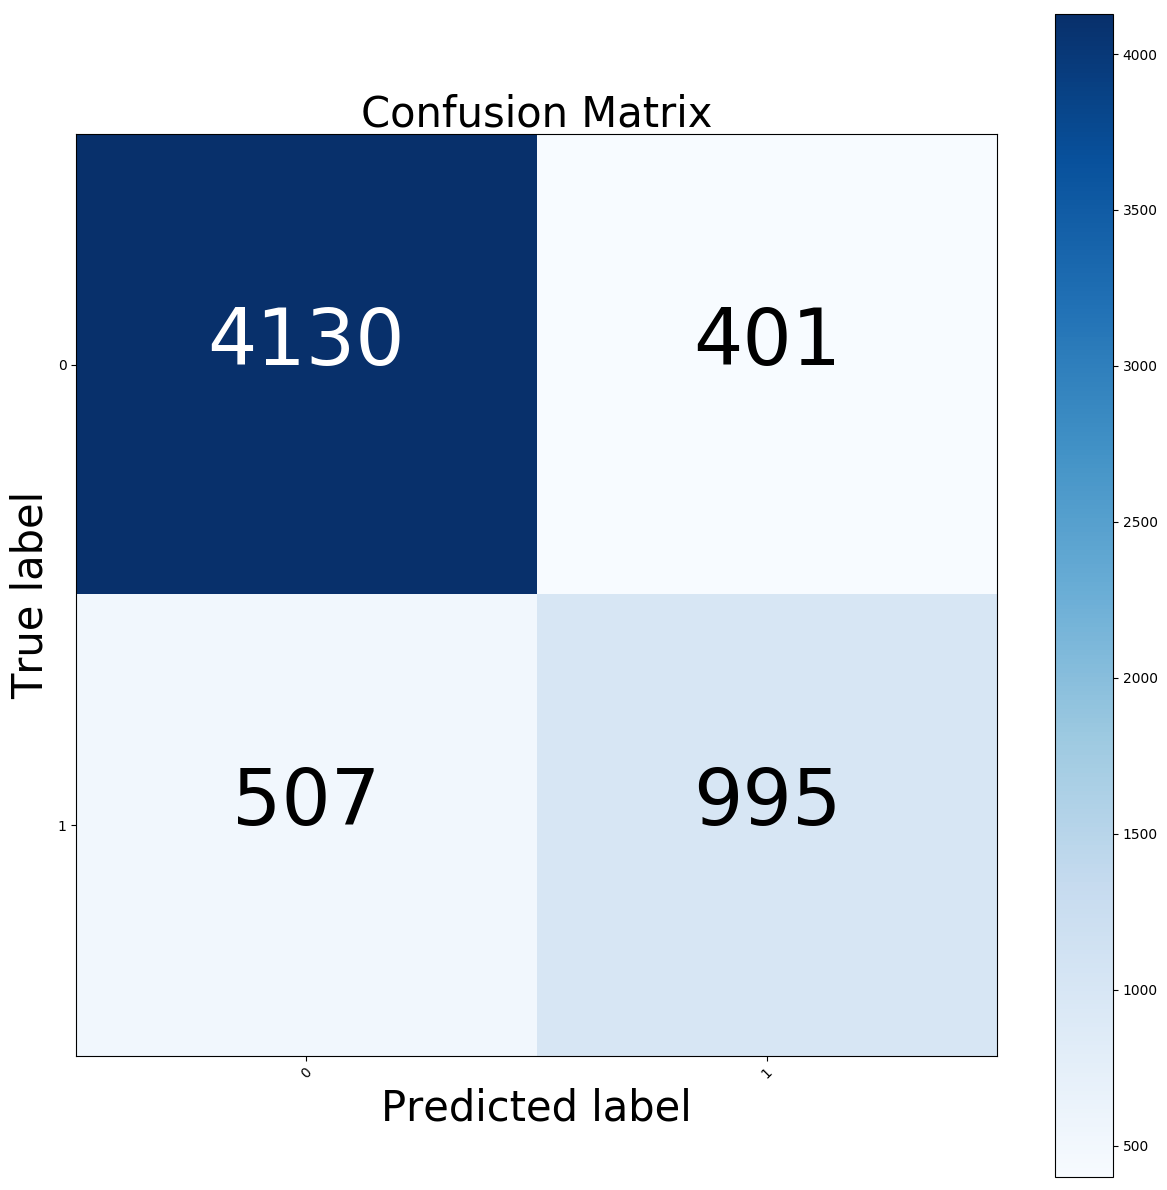

In [17]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)





Text(0.5,107.986,'Predicted label')

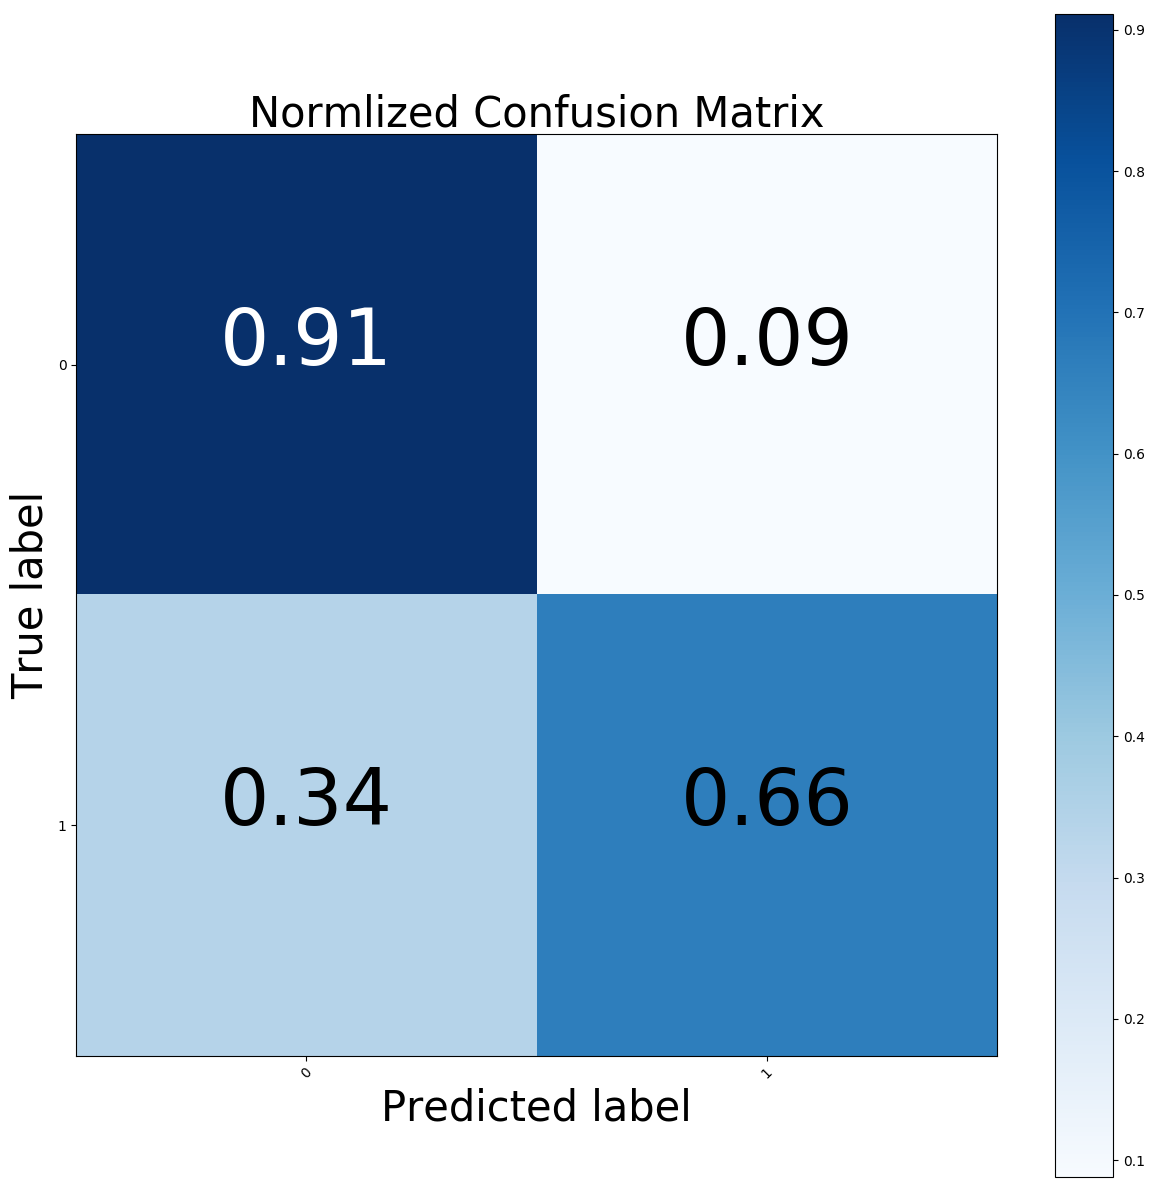

In [18]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=56)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [33]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  965  1013  1061  1109  1158  1206  1254  1302  1351  1399  1447  1495
  1544  1592  1640  1688  1737  1785  1833  1881  1930  2844  3758  4673
  5587  6501  7416  8330  9244 10158 11073 11987 12901 13816 14730 15644
 16559 17473 18387 19302]


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8300870285951099, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... , score=0.8182760049730626, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... , score=0.8193120596767509, total=   1.0s[CV] ....................... , score=0.8207625362619146, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ........................ , score=0.819933692498964, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... , score=0.8151678408619976, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8099875673435557, total=   1.0s[CV] ....................... , score=0.8143389970990468, total=   1.2s

[CV] ....................... , score=0.8135101533360961, total=   1.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8108164111065064, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.810401989225031, total=   1.1s[CV] ....................... , score=0.8137173642768338, total=   1.1s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8085370907583921, total=   1.2s[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    4.1s remaining:  1.1min


[CV] ....................... , score=0.8178615830915872, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8114380439287194, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8139245752175714, total=   1.3s
[CV] ....................... , score=0.8023207625362619, total=   1.3s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ....................... , score=0.8195192706174886, total=   1.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8153750518027352, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8133029423953585, total=   1.4s
[CV] ....................... , score=0.8126813095731454, total=   1.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8213841690841276, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8385826771653543, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8346456692913385, total=   1.6s
[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8356817239950269, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8423124740986324, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8416908412764194, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.838168255283879, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8383754662246167, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8439701616245338, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8385826771653543, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8389970990468296, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:   13.8s remaining:  1.2min


[CV] ....................... , score=0.8402403646912557, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8398259428097804, total=   4.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8389970990468296, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8377538334024036, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8159966846249482, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8164111065064236, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8263572316618317, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8222130128470784, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8195192706174886, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8408619975134687, total=   3.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8315375051802735, total=   0.5s[CV] ....................... , score=0.8168255283878989, total=   0.8s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8369249896394529, total=   4.5s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV]  ................................................................




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.824285122254455, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8296726067136345, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.822420223787816, total=   0.9s[CV] ....................... , score=0.8172399502693742, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8296726067136345, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8246995441359304, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8226274347285537, total=   0.9s[CV] ....................... , score=0.8276004973062577, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:   21.8s remaining:   58.9s


[CV] ....................... , score=0.8159966846249482, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8348528802320763, total=   0.7s[CV] ....................... , score=0.8340240364691256, total=   0.8s
[CV] ....................... , score=0.8168255283878989, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ........................ , score=0.838168255283879, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8356817239950269, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8431413178615831, total=   1.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8220058019063406, total=   1.4s
[CV] ....................... , score=0.8421052631578947, total=   1.1s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8338168255283879, total=   1.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8429341069208455, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8439701616245338, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   2.4s[CV] ....................... , score=0.8443845835060091, total=   2.5s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8445917944467468, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8437629506837961, total=   2.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8447990053874844, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8404475756319933, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8458350600911728, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8421052631578947, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:   31.6s remaining:   52.7s


[CV] ....................... , score=0.8447990053874844, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8108164111065064, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8101947782842934, total=   0.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8458350600911728, total=   3.7s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8468711147948612, total=   4.6s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8493576460837132, total=   4.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8213841690841276, total=   0.8s
[CV] ....................... , score=0.7832573559883962, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8193120596767509, total=   0.8s[CV] ........................ , score=0.818690426854538, total=   0.8s

[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8228346456692913, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8182760049730626, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.823663489432242, total=   0.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8139245752175714, total=   0.9s[CV] ....................... , score=0.8193120596767509, total=   0.1s[CV] ....................... , score=0.8124740986324078, total=   0.9s




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV]  ................................................................

[CV] ....................... , score=0.8282221301284708, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8180687940323249, total=   0.2s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8209697472026523, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.819933692498964, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:   39.0s remaining:   42.3s


[CV] ....................... , score=0.8143389970990468, total=   1.2s
[CV] ....................... , score=0.8162038955656858, total=   1.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8269788644840448, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.841276419394944, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8176543721508496, total=   1.4s[CV] ....................... , score=0.8385826771653543, total=   0.7s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8203481143804393, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8441773725652715, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8408619975134687, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.838168255283879, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8352673021135516, total=   2.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8389970990468296, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8431413178615831, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8398259428097804, total=   2.6s[CV] ....................... , score=0.8394115209283051, total=   1.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8460422710319104, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8423124740986324, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8414836303356817, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8433485288023208, total=   2.2s
[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8392043099875673, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8423124740986324, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:   49.7s remaining:   35.2s


[CV] ....................... , score=0.8474927476170742, total=   3.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8029015544041451, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8460422710319104, total=   3.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8192746113989637, total=   0.7s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8427268959801077, total=   1.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ........................ , score=0.815958549222798, total=   0.9s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8174093264248705, total=   0.8s[CV] ....................... , score=0.8252849740932643, total=   0.9s[CV] ....................... , score=0.8101554404145078, total=   0.2s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8209326424870467, total=   0.9s
[CV] ....................... , score=0.8277720207253886, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................[CV] ........................ , score=0.816580310880829, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8207253886010363, total=   1.0s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8273575129533679, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8167875647668393, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8385492227979274, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8178238341968912, total=   1.1s[CV]  ................................................................[CV] ....................... , score=0.8196891191709844, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':




[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8344041450777202, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8178238341968912, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8358549222797927, total=   0.3s[CV] ....................... , score=0.8246632124352331, total=   1.1s[CV]  ................................................................




/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8259067357512954, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:   55.2s remaining:   24.8s


[CV] ....................... , score=0.8412435233160622, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8236269430051814, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8290155440414507, total=   1.4s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8391709844559585, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8368911917098446, total=   1.2s
[CV] ....................... , score=0.8431088082901554, total=   1.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ..................................... , score=0.84, total=   1.5s
[CV] ....................... , score=0.8387564766839378, total=   2.0s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8414507772020725, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8420725388601036, total=   2.0s
[CV] ....................... , score=0.8395854922279793, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8366839378238342, total=   3.4s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.840621761658031, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8412435233160622, total=   3.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8410362694300518, total=   3.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8433160621761658, total=   2.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8455958549222798, total=   2.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.842901554404145, total=   1.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.809119170984456, total=   0.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8176165803108808, total=   0.7s

[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:  1.1min remaining:   17.2s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8435233160621761, total=   2.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8304663212435233, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8103626943005181, total=   0.1s[CV] ....................... , score=0.8269430051813471, total=   0.8s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8192746113989637, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8487046632124352, total=   3.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8103626943005181, total=   0.9s[CV] ....................... , score=0.8252849740932643, total=   0.9s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8186528497409327, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ......................... , score=0.81139896373057, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8281865284974094, total=   0.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8273575129533679, total=   0.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8188601036269431, total=   1.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8219689119170984, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8163730569948187, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8317098445595855, total=   0.9s
[CV] ....................... , score=0.8155440414507772, total=   1.4s

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':



[CV]  ................................................................
[CV] ....................... , score=0.8350259067357513, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8341968911917098, total=   0.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8184455958549223, total=   1.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................


[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:  1.2min remaining:    8.0s


[CV] ....................... , score=0.8480829015544041, total=   0.5s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV] ....................... , score=0.8157512953367876, total=   1.4s[CV]  ................................................................



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8323316062176166, total=   1.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8420725388601036, total=   0.8s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8426943005181348, total=   1.7s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8373056994818653, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8414507772020725, total=   2.3s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8397927461139897, total=   2.7s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8356476683937824, total=   2.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8387564766839378, total=   1.6s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................[CV] ....................... , score=0.8443523316062176, total=   2.6s



/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8408290155440414, total=   2.1s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8418652849740933, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8449740932642487, total=   1.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8418652849740933, total=   3.0s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ....................... , score=0.8455958549222798, total=   3.9s


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':


[CV]  ................................................................
[CV] ........................ , score=0.846839378238342, total=   2.9s
[CV] ....................... , score=0.8420725388601036, total=   3.9s
[CV] ....................... , score=0.8462176165803109, total=   3.3s
[CV] ....................... , score=0.8437305699481865, total=   3.5s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  1.4min finished


In [34]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve', fontsize=35)

# plt.xlabel('Training examples (count)', fontsize=30)
# plt.ylabel('Balanced Accuracy (0.0 - 1.0)', fontsize=30)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# ---------------------------------------------------------------


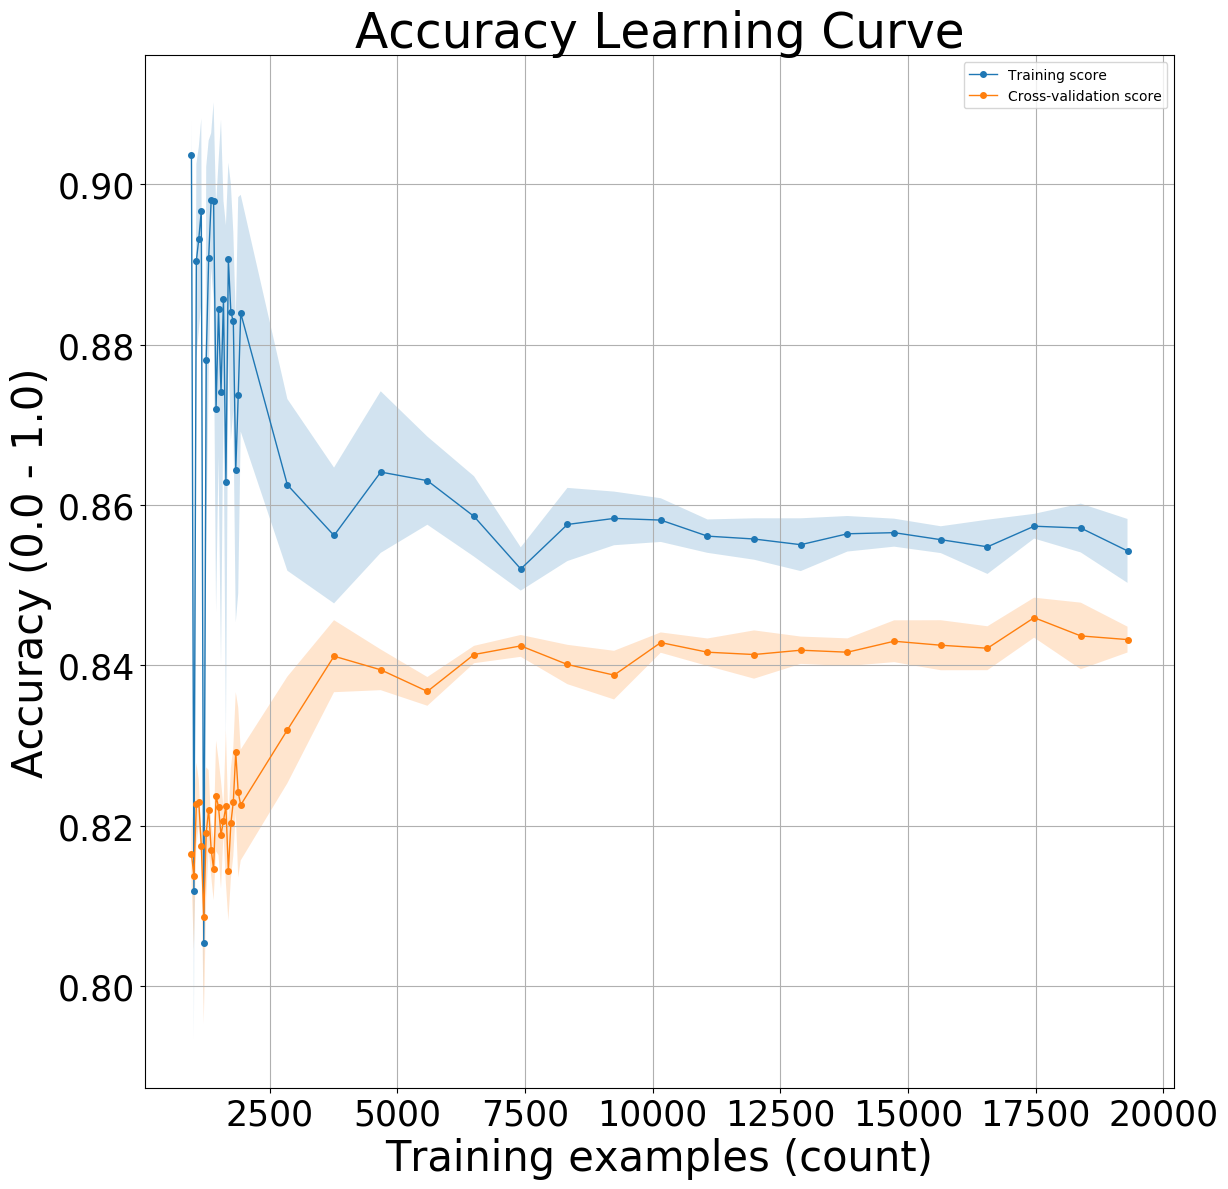

In [35]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------



In [36]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# -------------------------------------------


In [37]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# -------------------------------------------


In [38]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

No handles with labels found to put in legend.


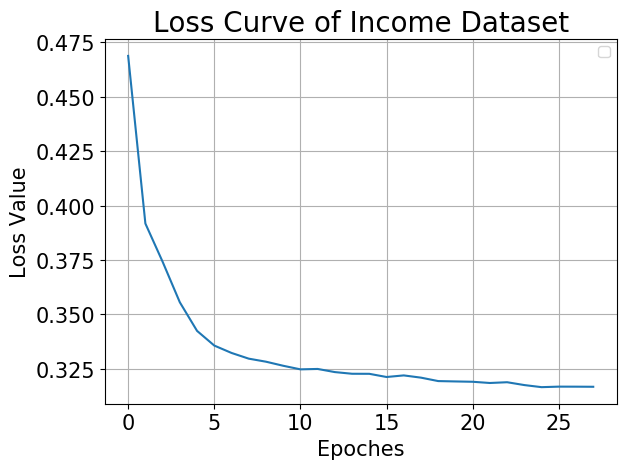

In [48]:
loss_values = best_estimator.loss_curve_
plt.show()


plt.close('all')
plt.figure()
plt.title('Loss Curve of Income Dataset', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('Epoches', fontsize=15)
plt.ylabel('Loss Value', fontsize=15)
plt.grid()
plt.tight_layout()

plt.plot(loss_values)

plt.legend(loc="best")
plt.tight_layout()



training: learning-rate-0.1
Training set score: 0.849967
Training set loss: 0.341416
training: learning-rate-0.01
Training set score: 0.848309
Training set loss: 0.327487
training: learning-rate-0.001
Training set score: 0.846030
Training set loss: 0.329891
training: learning-rate-0.0001
Training set score: 0.827959
Training set loss: 0.378424
training: learning-rate-0.00001
Training set score: 0.751119
Training set loss: 0.517590
training: learning-rate-0.000001
Training set score: 0.751119
Training set loss: 0.620203
training: learning-rate-1.0
Training set score: 0.802968
Training set loss: 0.460736
training: learning-rate-10.0
Training set score: 0.751119
Training set loss: 1.201213
learning-rate-0.1
learning-rate-0.01
learning-rate-0.001
learning-rate-0.0001
learning-rate-0.00001
learning-rate-0.000001
learning-rate-1.0


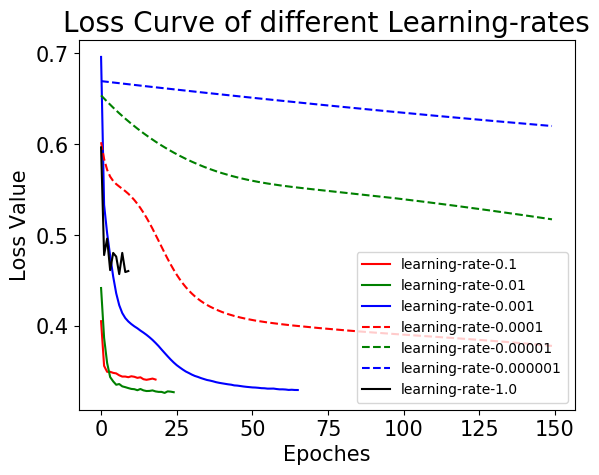

In [50]:
import warnings

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# different learning rate schedules and momentum parameters

labels = [
    "learning-rate-0.1",
    "learning-rate-0.01",
        "learning-rate-0.001",
        "learning-rate-0.0001",
        "learning-rate-0.00001",
        "learning-rate-0.000001",
        "learning-rate-1.0",
        "learning-rate-10.0",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]

learning_rate_init_adjust = [10 ** -x for x in np.arange(-2.0, 6.0)]
# The best parameters are: MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto',
#        beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
#        hidden_layer_sizes=(16, 16), learning_rate='constant',
#        learning_rate_init=0.01, max_iter=200, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=None,
#        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#        verbose=False, warm_start=False)
    
params = [
    {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.1,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
      {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.01,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.001,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.0001,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.00001,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 0.000001,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 1.0,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
        {
        "solver":'adam',
        "learning_rate": "constant",
        "momentum": 0.9,
        "learning_rate_init": 10.0,
        "hidden_layer_sizes": (16,16),
        "tol": 0.0001,
        "alpha": 0.01, "activation": 'logistic'
    },
]



    # for each dataset, plot learning for each learning strategy

mlps = []

plt.close('all')
plt.figure()
plt.title('Loss Curve of different Learning-rates', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('Epoches', fontsize=15)
plt.ylabel('Loss Value', fontsize=15)

max_iter = 150
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(max_iter=max_iter, **param)
    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore", category=ConvergenceWarning, module="sklearn"
        )
        mlp.fit(training_x,training_y)
    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(training_x, training_y))
    print("Training set loss: %f" % mlp.loss_)
for mlp, label, args in zip(mlps, labels, plot_args):
    print(label)
    plt.plot(mlp.loss_curve_, label=label, **args)
plt.legend(loc="best")

plt.show()

# Compelxity Param: Learning Rate

In [39]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "alpha", alphas, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)
learning_rate_init_adjust = [10 ** -x for x in np.arange(-2.0, 6.0)]


accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "learning_rate_init", learning_rate_init_adjust, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "alpha", alphas, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "alpha", alphas, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "alpha", alphas, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/externals/joblib/backports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/home/shari/

In [40]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: Learning Rate', fontsize=20)

# plt.xlabel('Learning Rate (1e-6 - 1e-2)', fontsize=15)
# plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = alphas

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'log'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

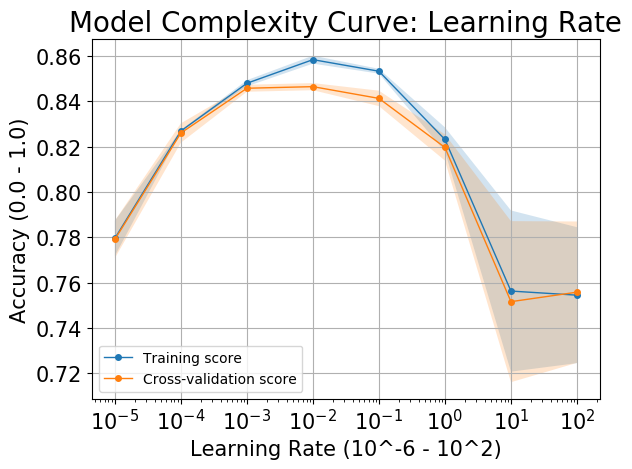

In [42]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: Learning Rate', fontsize=20)
plt.tick_params(labelsize=15)

plt.xlabel('Learning Rate (10^-6 - 10^2)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = learning_rate_init_adjust


train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'log'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


NameError: name 'precision_train_scores' is not defined

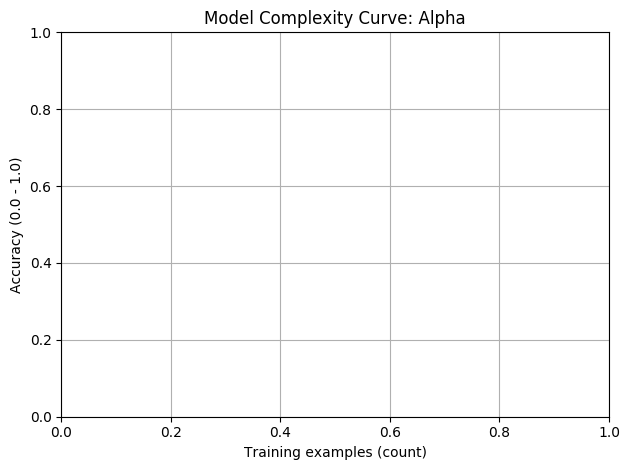

In [31]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: Alpha')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = alphas

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'log'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()


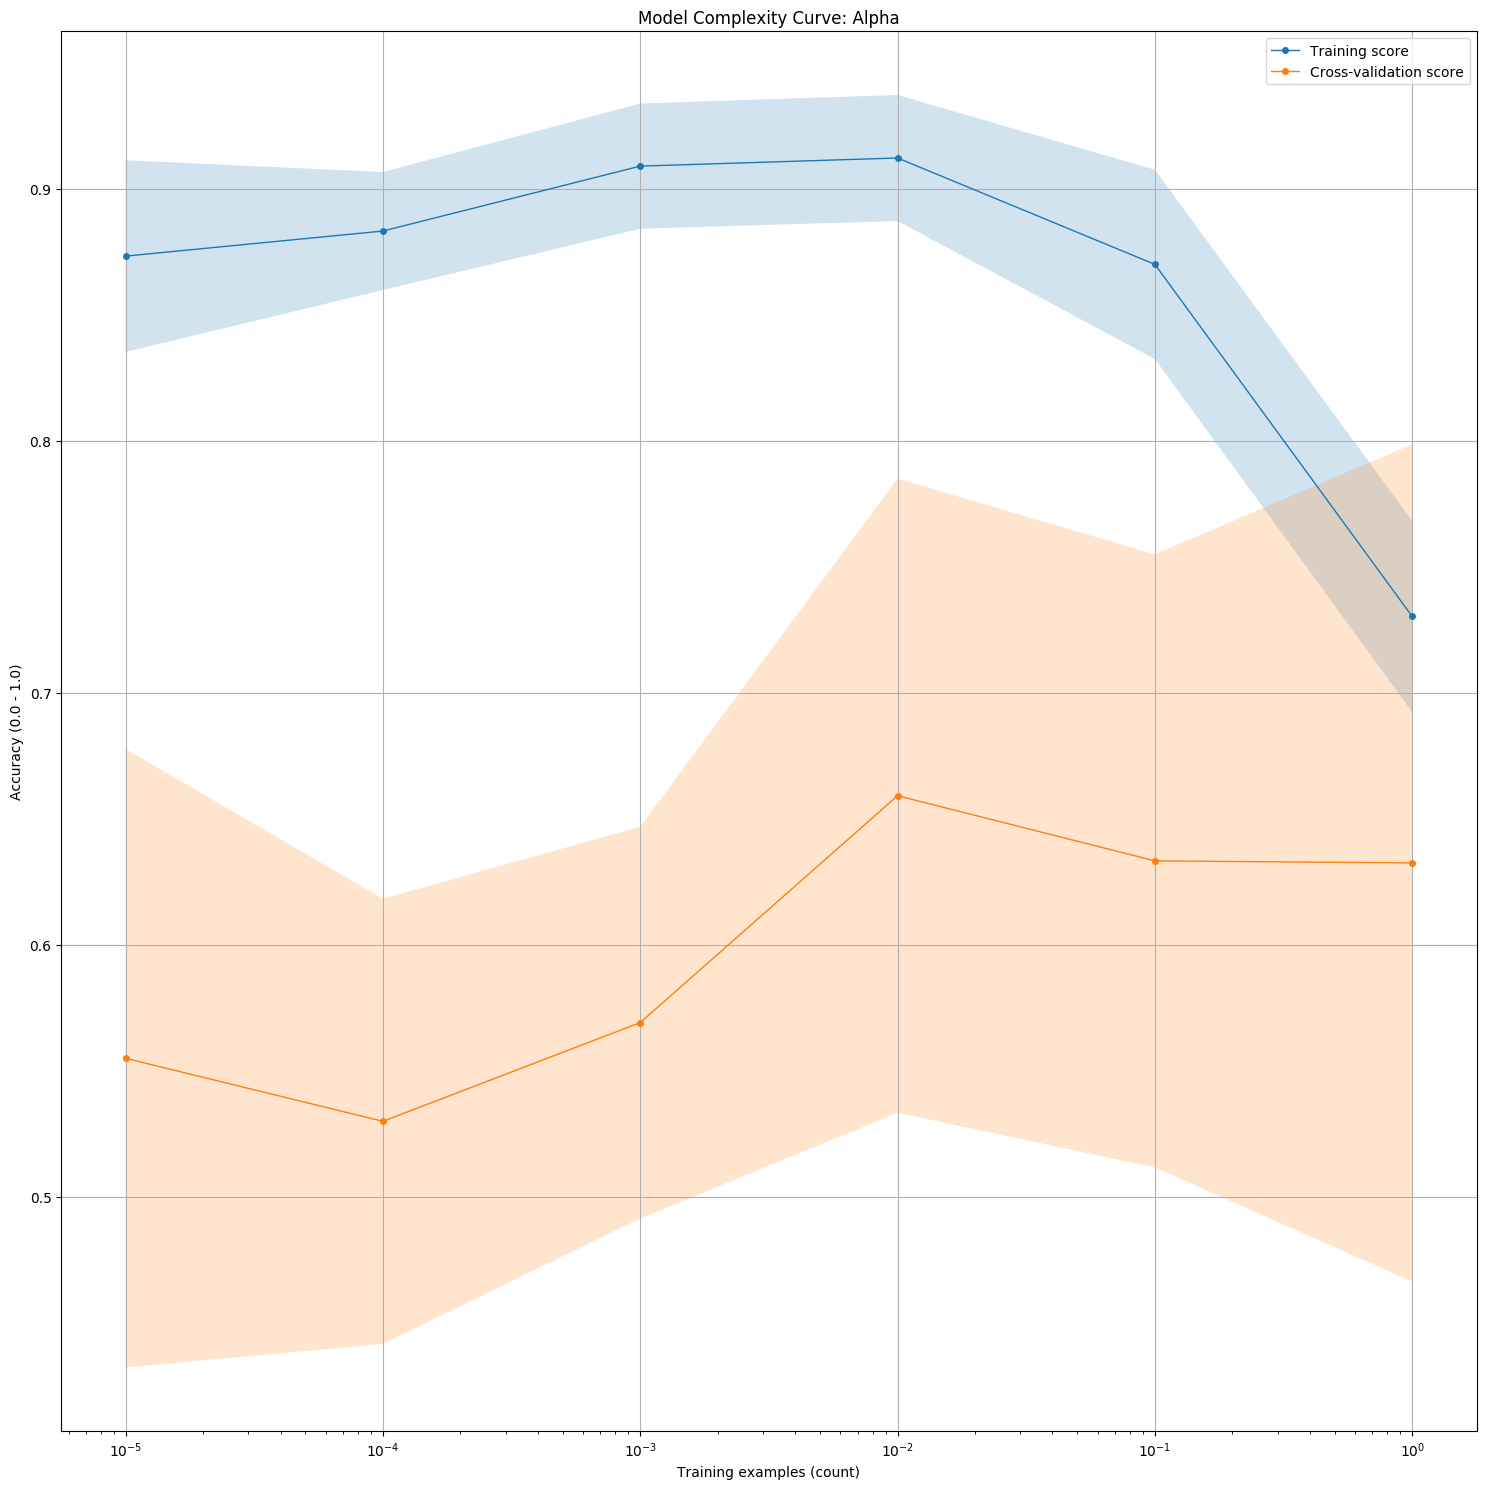

In [149]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: Alpha')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = alphas

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'log'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()


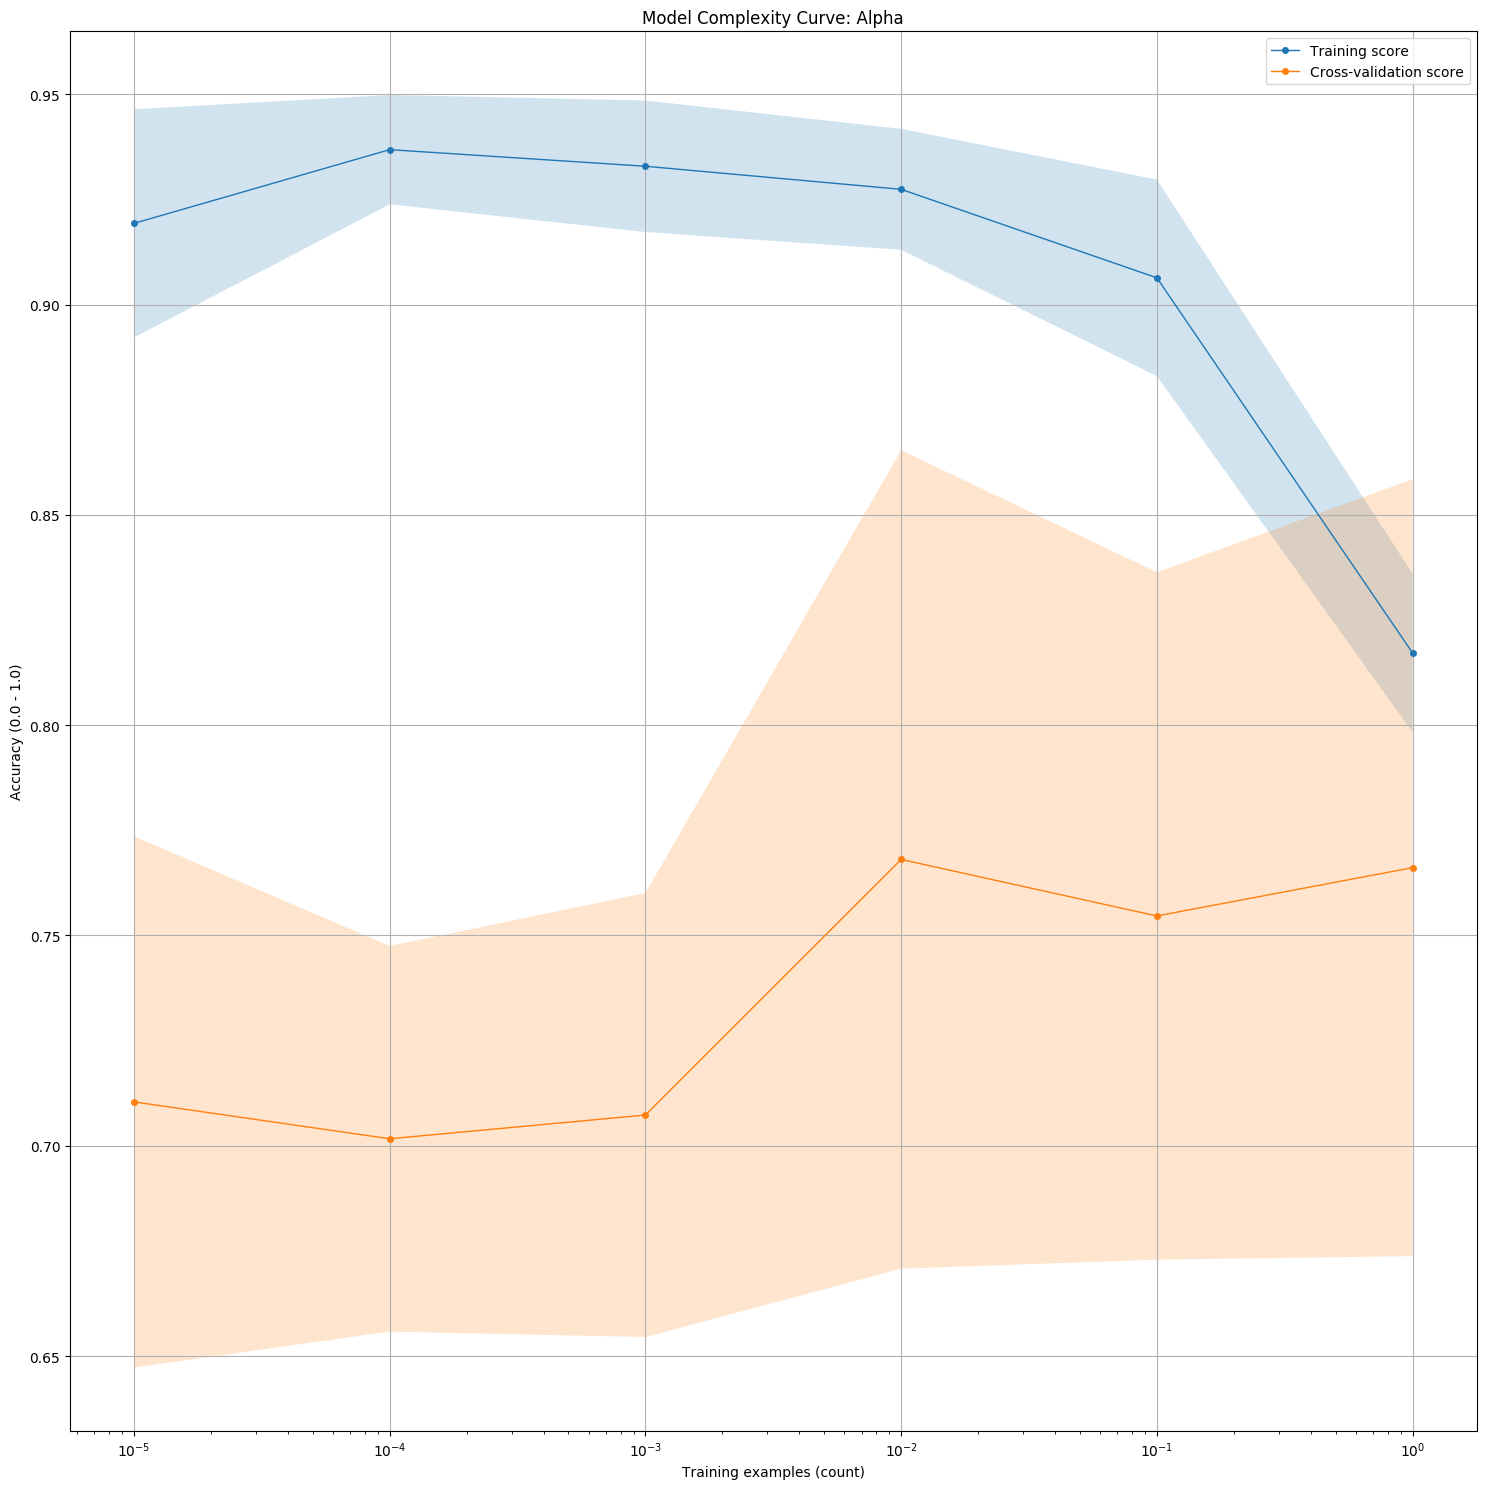

In [150]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: Alpha')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = alphas

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'log'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()


# Timing Curve

In [51]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

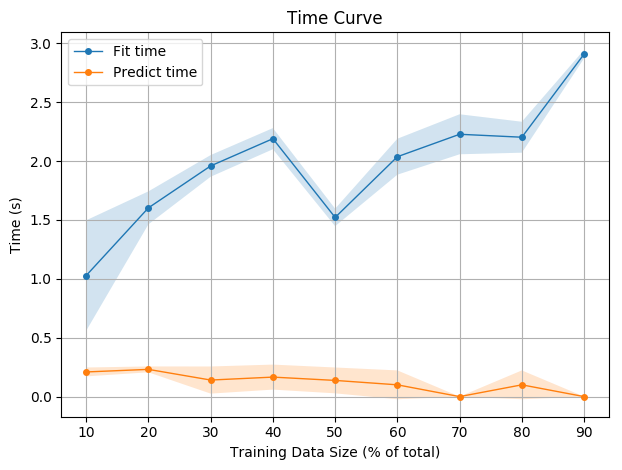

In [52]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [53]:
print(fit_scores_mean)
print(predict_scores_mean)

[1.028125 1.603125 1.959375 2.190625 1.521875 2.0375   2.228125 2.203125
 2.909375]
[0.209375 0.23125  0.140625 0.165625 0.1375   0.1      0.       0.1
 0.      ]
